In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

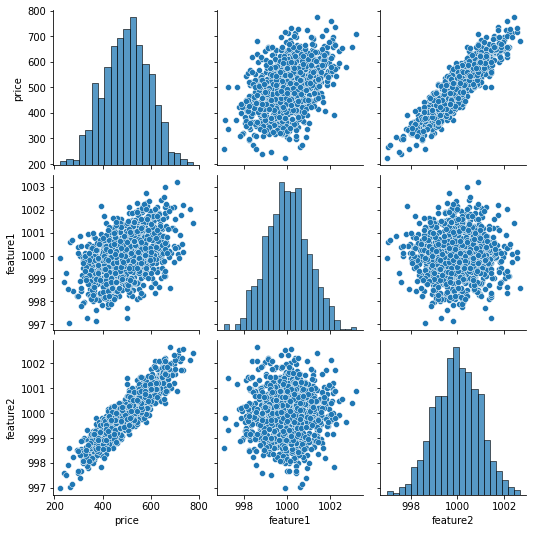

In [5]:
sns.pairplot(df)

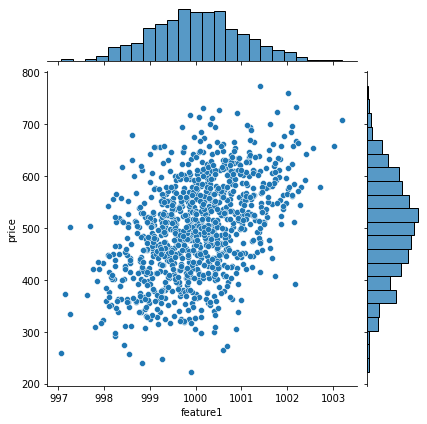

In [6]:
sns.jointplot(x='feature1',y='price',data=df)

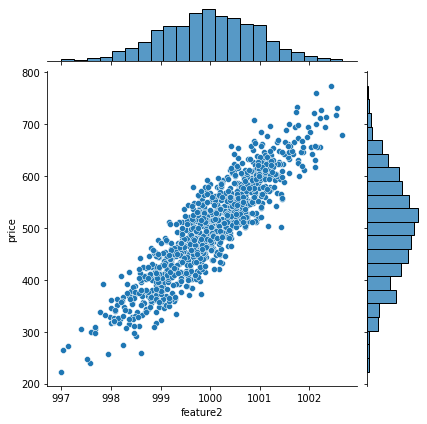

In [8]:
sns.jointplot(x='feature2',y='price',data=df)

C:\Users\love\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

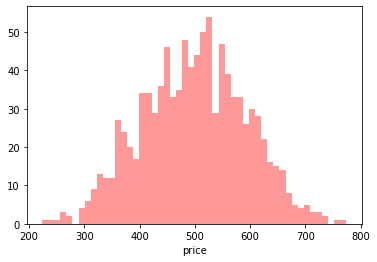

In [11]:
sns.distplot(df['price'],bins=50,color='red',kde=False)

<AxesSubplot:xlabel='feature1'>

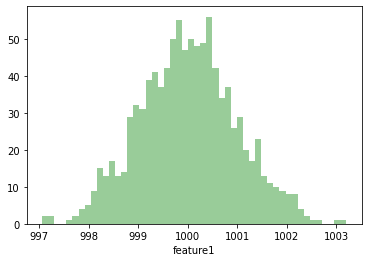

In [12]:
sns.distplot(df['feature1'],bins=50,color='green',kde=False)

<AxesSubplot:xlabel='feature2'>

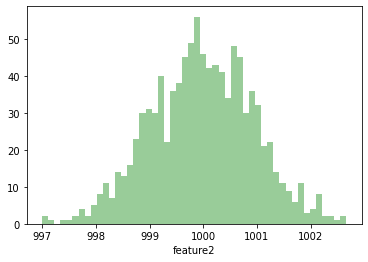

In [13]:
sns.distplot(df['feature2'],bins=50,color='green',kde=False)

<AxesSubplot:xlabel='feature1', ylabel='price'>

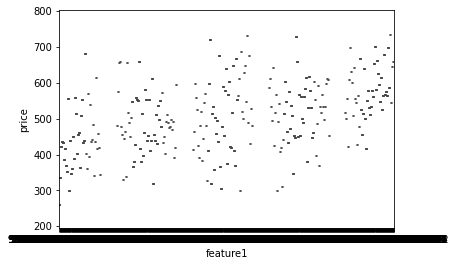

In [15]:
sns.boxplot(x='feature1',y='price',data=df,palette='rainbow')

<AxesSubplot:xlabel='feature2', ylabel='price'>

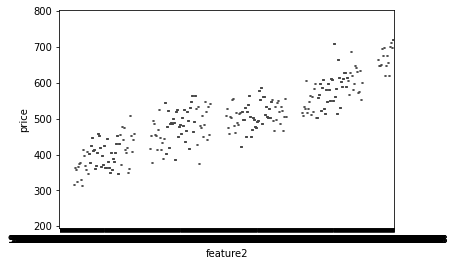

In [16]:
sns.boxplot(x='feature2',y='price',data=df,palette='rainbow')

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
#convert Pandas to Numpy for keras
#features
X = df[['feature1','feature2']].values

#label
y = df['price'].values

#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)


In [34]:
X_train.shape

(700, 2)

In [35]:
X_test.shape

(300, 2)

In [36]:
y_train.shape

(700,)

In [38]:
y_test.shape

(300,)

In [39]:
#normalizing data
from sklearn.preprocessing import MinMaxScaler

In [40]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to False to perform inplace row normalization and avoid a
 |      copy (if t

In [41]:
scaler = MinMaxScaler()

In [42]:
#fit the scaler from the test set, to prevent it from leakage
scaler.fit(X_train)

MinMaxScaler()

In [43]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
import tensorflow as tf

C:\Users\love\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\love\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\love\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\love\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\f

In [45]:
from tensorflow.keras.models import Sequential

In [46]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense(32))
 |  model.add(Dense(32))
 |  model.com

In [47]:
#Creating a Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [48]:
#list of layers
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

In [49]:
#or adding lavers one by one
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

In [59]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

# Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [60]:
model.compile(optimizer='rmsprop',loss='mse')

In [61]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
700/700 [==============================] - 6s 8ms/step - loss: 259069.8166
Epoch 2/250
700/700 [==============================] - 0s 69us/step - loss: 259003.7686
Epoch 3/250
700/700 [==============================] - 0s 57us/step - loss: 258937.0293
Epoch 4/250
700/700 [==============================] - 0s 57us/step - loss: 258864.5799
Epoch 5/250
700/700 [==============================] - 0s 57us/step - loss: 258785.3050
Epoch 6/250
700/700 [==============================] - 0s 46us/step - loss: 258698.0175
Epoch 7/250
700/700 [==============================] - 0s 46us/step - loss: 258603.5724
Epoch 8/250
700/700 [==============================] - 0s 57us/step - loss: 258500.3073
Epoch 9/250
700/700 [==============================] - 0s 57us/step - loss: 258387.6126
Epoch 10/250
700/700 [==============================] - 0s 46us/step - loss: 258265.2913
Epoch 11/250
700/700 [==============================] - 0s 57us/step - loss: 258132.3679
Epoch 12/250
700/700 [=========

700/700 [==============================] - 0s 57us/step - loss: 122270.1996
Epoch 94/250
700/700 [==============================] - 0s 46us/step - loss: 118372.7127
Epoch 95/250
700/700 [==============================] - 0s 69us/step - loss: 114442.2430
Epoch 96/250
700/700 [==============================] - 0s 46us/step - loss: 110483.8447
Epoch 97/250
700/700 [==============================] - 0s 46us/step - loss: 106495.8179
Epoch 98/250
700/700 [==============================] - 0s 46us/step - loss: 102477.7581
Epoch 99/250
700/700 [==============================] - 0s 34us/step - loss: 98445.2321
Epoch 100/250
700/700 [==============================] - 0s 45us/step - loss: 94392.2075
Epoch 101/250
700/700 [==============================] - 0s 22us/step - loss: 90341.9881
Epoch 102/250
700/700 [==============================] - 0s 45us/step - loss: 86279.6483
Epoch 103/250
700/700 [==============================] - 0s 45us/step - loss: 82230.8243
Epoch 104/250
700/700 [============

700/700 [==============================] - 0s 114us/step - loss: 872.6304
Epoch 186/250
700/700 [==============================] - 0s 57us/step - loss: 857.4242
Epoch 187/250
700/700 [==============================] - 0s 46us/step - loss: 841.3009
Epoch 188/250
700/700 [==============================] - 0s 57us/step - loss: 825.2617
Epoch 189/250
700/700 [==============================] - 0s 46us/step - loss: 809.8794
Epoch 190/250
700/700 [==============================] - 0s 46us/step - loss: 793.3499
Epoch 191/250
700/700 [==============================] - 0s 57us/step - loss: 777.8222
Epoch 192/250
700/700 [==============================] - 0s 46us/step - loss: 762.5941
Epoch 193/250
700/700 [==============================] - 0s 57us/step - loss: 746.9139
Epoch 194/250
700/700 [==============================] - 0s 46us/step - loss: 731.8418
Epoch 195/250
700/700 [==============================] - 0s 46us/step - loss: 716.3337
Epoch 196/250
700/700 [==============================] -

In [62]:
#Evaulate
model.history.history

{'loss': [259069.81660714286,
  259003.76857142858,
  258937.0292857143,
  258864.5799107143,
  258785.305,
  258698.0175,
  258603.5724107143,
  258500.30732142858,
  258387.6125892857,
  258265.29125,
  258132.36794642857,
  257987.17321428572,
  257830.51455357144,
  257661.20169642856,
  257477.88160714286,
  257280.00214285715,
  257067.39410714287,
  256837.29669642856,
  256590.73982142858,
  256326.92125,
  256043.42401785715,
  255741.37883928572,
  255418.33017857143,
  255072.76196428572,
  254704.30017857143,
  254312.1036607143,
  253895.21535714285,
  253453.90366071428,
  252986.369375,
  252488.16553571427,
  251963.628125,
  251408.2713392857,
  250821.14410714287,
  250202.58410714284,
  249553.27214285714,
  248864.26053571427,
  248141.316875,
  247381.3455357143,
  246586.99616071428,
  245753.6086607143,
  244876.25910714286,
  243960.18705357143,
  243001.59714285715,
  241999.11955357142,
  240949.90339285714,
  239855.4850892857,
  238713.82946428572,
  237528.

In [63]:
loss = model.history.history['loss']

Text(0.5, 1.0, 'Training Loss per Epoch')

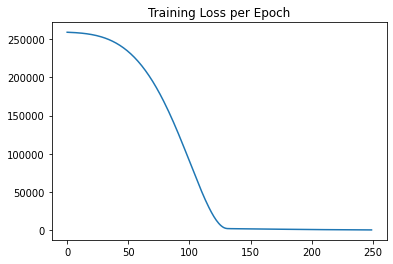

In [64]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch")

In [65]:
#Final Evalutaion
model.metrics_names

['loss']

In [66]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [67]:
training_score

137.35040309361048

In [68]:
test_score

154.47230122884113

In [69]:
#more evaluation
test_predictions = model.predict(X_test)

In [70]:
test_predictions

array([[640.1665 ],
       [512.2432 ],
       [519.25287],
       [489.35165],
       [539.75397],
       [551.26636],
       [592.3809 ],
       [617.9327 ],
       [592.31506],
       [552.4005 ],
       [427.90073],
       [479.72678],
       [455.61774],
       [486.7987 ],
       [493.40518],
       [559.9781 ],
       [381.93982],
       [503.97147],
       [572.0731 ],
       [529.11475],
       [478.51343],
       [364.54947],
       [488.9958 ],
       [527.9513 ],
       [577.88947],
       [542.39374],
       [382.49442],
       [549.33167],
       [631.30853],
       [509.77072],
       [559.51917],
       [489.8494 ],
       [552.3994 ],
       [680.3835 ],
       [396.87366],
       [444.05182],
       [467.7898 ],
       [441.9912 ],
       [397.10263],
       [555.0161 ],
       [349.80704],
       [605.9235 ],
       [604.1464 ],
       [525.05334],
       [569.43024],
       [489.0135 ],
       [462.2577 ],
       [423.06705],
       [519.9015 ],
       [615.66113],


In [71]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [72]:
pred_df

,Test Y
0,655.391403
1,511.366708
2,515.778446
3,478.358238
4,543.830279
...,...
295,372.777436
296,639.818362
297,403.062564
298,579.428431


In [73]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [74]:
test_predictions

0      640.166504
1      512.243225
2      519.252869
3      489.351654
4      539.753967
          ...    
295    387.014435
296    624.203979
297    409.125793
298    577.580688
299    513.356445
Length: 300, dtype: float32

In [75]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [76]:
pred_df.columns = ['Test Y','Model Predictions']

In [77]:
pred_df

,Test Y,Model Predictions
0,655.391403,640.166504
1,511.366708,512.243225
2,515.778446,519.252869
3,478.358238,489.351654
4,543.830279,539.753967
...,...,...
295,372.777436,387.014435
296,639.818362,624.203979
297,403.062564,409.125793
298,579.428431,577.580688


<AxesSubplot:xlabel='Test Y', ylabel='Model Predictions'>

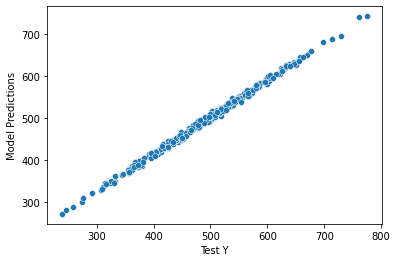

In [78]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [79]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

C:\Users\love\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Error', ylabel='Density'>

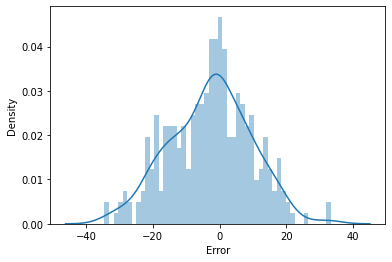

In [80]:
sns.distplot(pred_df['Error'],bins=50)

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [82]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

9.765516691969903

In [83]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

154.4722953271149

In [84]:
test_score

154.47230122884113

In [85]:
test_score**0.5

12.428688636732401

In [86]:
#predicting on new data
new_gem = [[998,1000]]

In [88]:
scaler.transform(new_gem)

array([[0.14117652, 0.52980619]])

In [89]:
new_gem = scaler.transform(new_gem)

In [90]:
model.predict(new_gem)

array([[431.70767]], dtype=float32)

In [91]:
from tensorflow.keras.models import load_model

In [94]:
model.save('my_model.h5')

In [98]:
model.predict(new_gem)

array([[431.70767]], dtype=float32)